# The Lifecycle of a Plot

플롯 전체를 만드는 과정


In [11]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

# Getting started

시작해봅시다

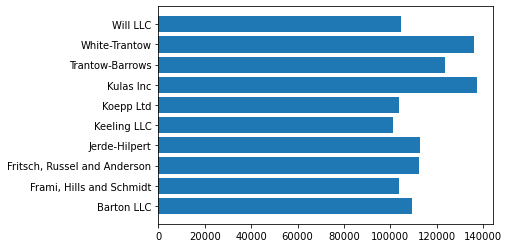

In [16]:
# make figure instance

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
plt.show()

# Controlling the style

스타일을 바꾸는 법

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [72]:
plt.style.use('seaborn')

<BarContainer object of 10 artists>

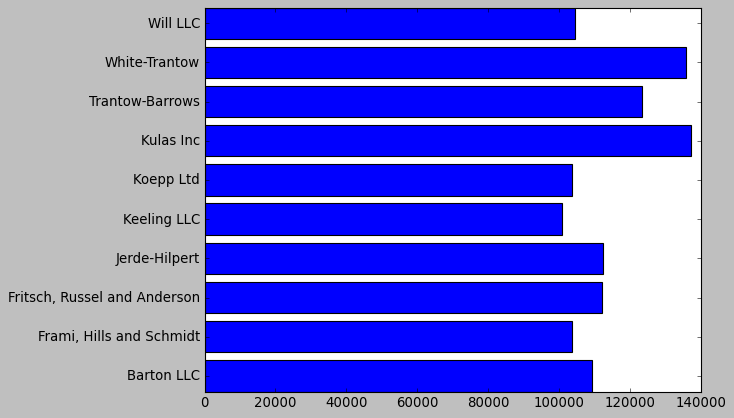

In [40]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

# Customizing the plot

플롯을 커스터마이징 하는법

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

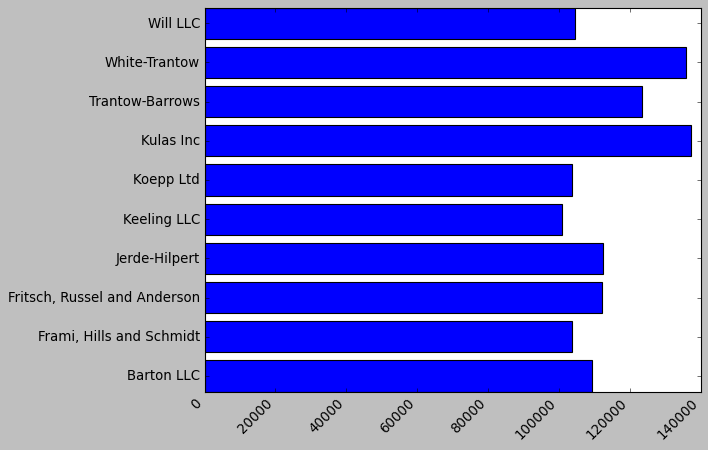

In [42]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

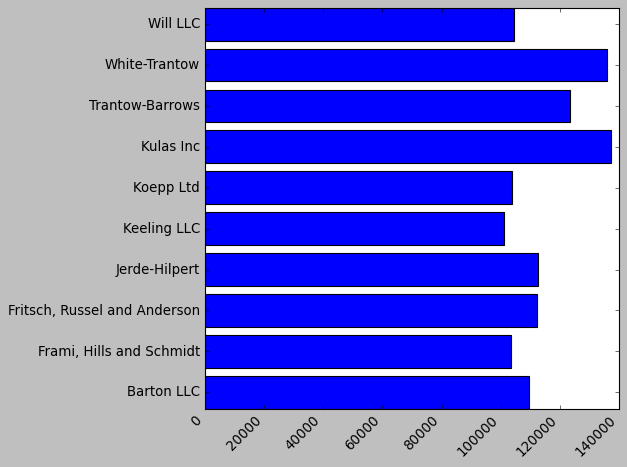

In [44]:
# Customizing with rcParams

plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")

In [78]:
plt.style.use('fivethirtyeight')

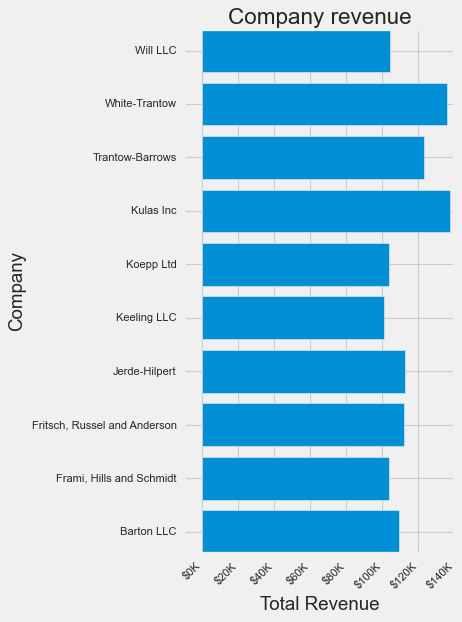

In [79]:
# artist.set
fig, ax = plt.subplots(figsize=(6,8)) #figsize는 wid,ht의 형태로 subplots안에 넣을 수 있다.
ax.barh(group_names, group_data) #bar horizontal
labels = ax.get_xticklabels() #xticks의 값을 list로 받고 싶다면
plt.setp(labels, rotation=45, horizontalalignment='right') # none OO형식으로 artist를 만지고 싶다면
ax.set(xlim=[-10000, 140000], xlabel="Total Revenue", ylabel="Company", title="Company revenue") # OO 형식으로 artist를 건들고 싶다면
ax.xaxis.set_major_formatter(currency) # axis의 값의 서식을 건들고 싶다면
plt.show()


In [69]:
# set_major_formatter의 formatter


def currency(x, pos) : # x는 xticks의 value, pos는 그 값의 위치
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6) #소수점 첫째자리까지
    else :
        s = '${:1.0f}K'.format(x*1e-3) #정수만 표현
    return s # x는 s가 되어서 나온다.

# Combining multiple visualization

여러가지 Customizing을 조합

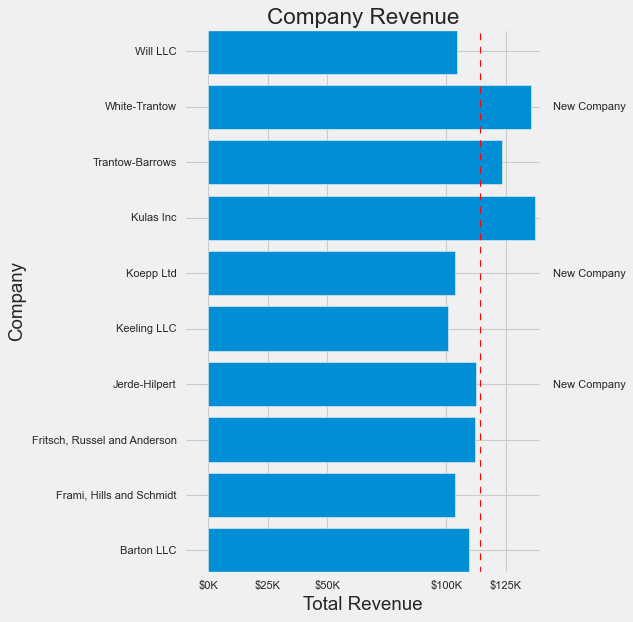

In [84]:
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(group_names, group_data)
lables = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right') #artist property

# Add vertical line for group mean with linestyle '--', and colored red
ax.axvline(group_mean, ls="--", color='r', lw = 1.0)

# Annotate new companies 
for group in [3, 5, 8] : 
    ax.text(145000, group, "New Company", fontsize=10, 
            verticalalignment='center') # x position, y position will texted "New company" with fontsize 10, verically aligned 'center'
    
    
# Now we move our title up since it's getting a little cramped (비좁으니까 이제 좀 타이틀을 위로 올려보자.)
ax.title.set(y=1.05) # proportionally positioned title
    


ax.set(xlim=[-10000, 140000], xlabel="Total Revenue", ylabel="Company", title="Company Revenue") #artist itself
ax.xaxis.set_major_formatter(currency) 
ax.set_xticks([0, 25e3, 50e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()


# Saving our plot

플롯을 저장하기

In [120]:
# fig의 저장 가능한 파일 타입 목록

fig.savefig('sales.svg', transparent=True, dpi=100, bbox_inches="tight")